In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-file/timelapse_test.mp4


**Data Analysis **

In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from glob import glob
import IPython.display as ipd
from tqdm.notebook import tqdm

import subprocess

In [3]:
input_file="/kaggle/input/video-file/timelapse_test.mp4"
subprocess.run(['ffmpeg','-i',input_file,'-qscale',"0",'timelapse_test.mp4'])

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

CompletedProcess(args=['ffmpeg', '-i', '/kaggle/input/video-file/timelapse_test.mp4', '-qscale', '0', 'timelapse_test.mp4'], returncode=0)

In [4]:
!ls -Gflash --color

total 73M
 73M -rw-r--r-- 1 root  73M Mar 25 15:06 timelapse_test.mp4
4.0K drwxr-xr-x 5 root 4.0K Mar 25 15:04 ..
4.0K drwxr-xr-x 3 root 4.0K Mar 25 15:05 .
4.0K drwxr-xr-x 2 root 4.0K Mar 25 15:05 .virtual_documents


In [5]:
ipd.Video("timelapse_test.mp4",width=500)

In [6]:
cap = cv2.VideoCapture("timelapse_test.mp4")

In [7]:
print(cap.get(cv2.CAP_PROP_FRAME_COUNT)
,cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
,cap.get(cv2.CAP_PROP_FRAME_WIDTH))

4077.0 608.0 1080.0


In [8]:
print(cap.get(cv2.CAP_PROP_FPS))

32.0


In [9]:
cap.release()

In [10]:
cap = cv2.VideoCapture("timelapse_test.mp4")

In [11]:
ret,img=cap.read()

In [12]:
img.shape

(608, 1080, 3)

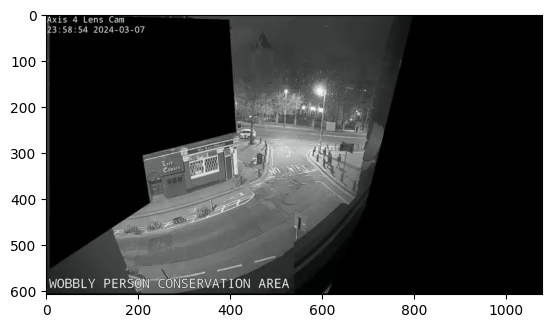

In [13]:
plt.imshow(img)

In [14]:
cap.release()

In [15]:
ls

timelapse_test.mp4


In [16]:
rm -r /root/train

rm: cannot remove '/root/train': No such file or directory


In [17]:
mkdir /root/train

In [18]:
ls /root/train

IndexError: index 25 is out of bounds for axis 0 with size 25

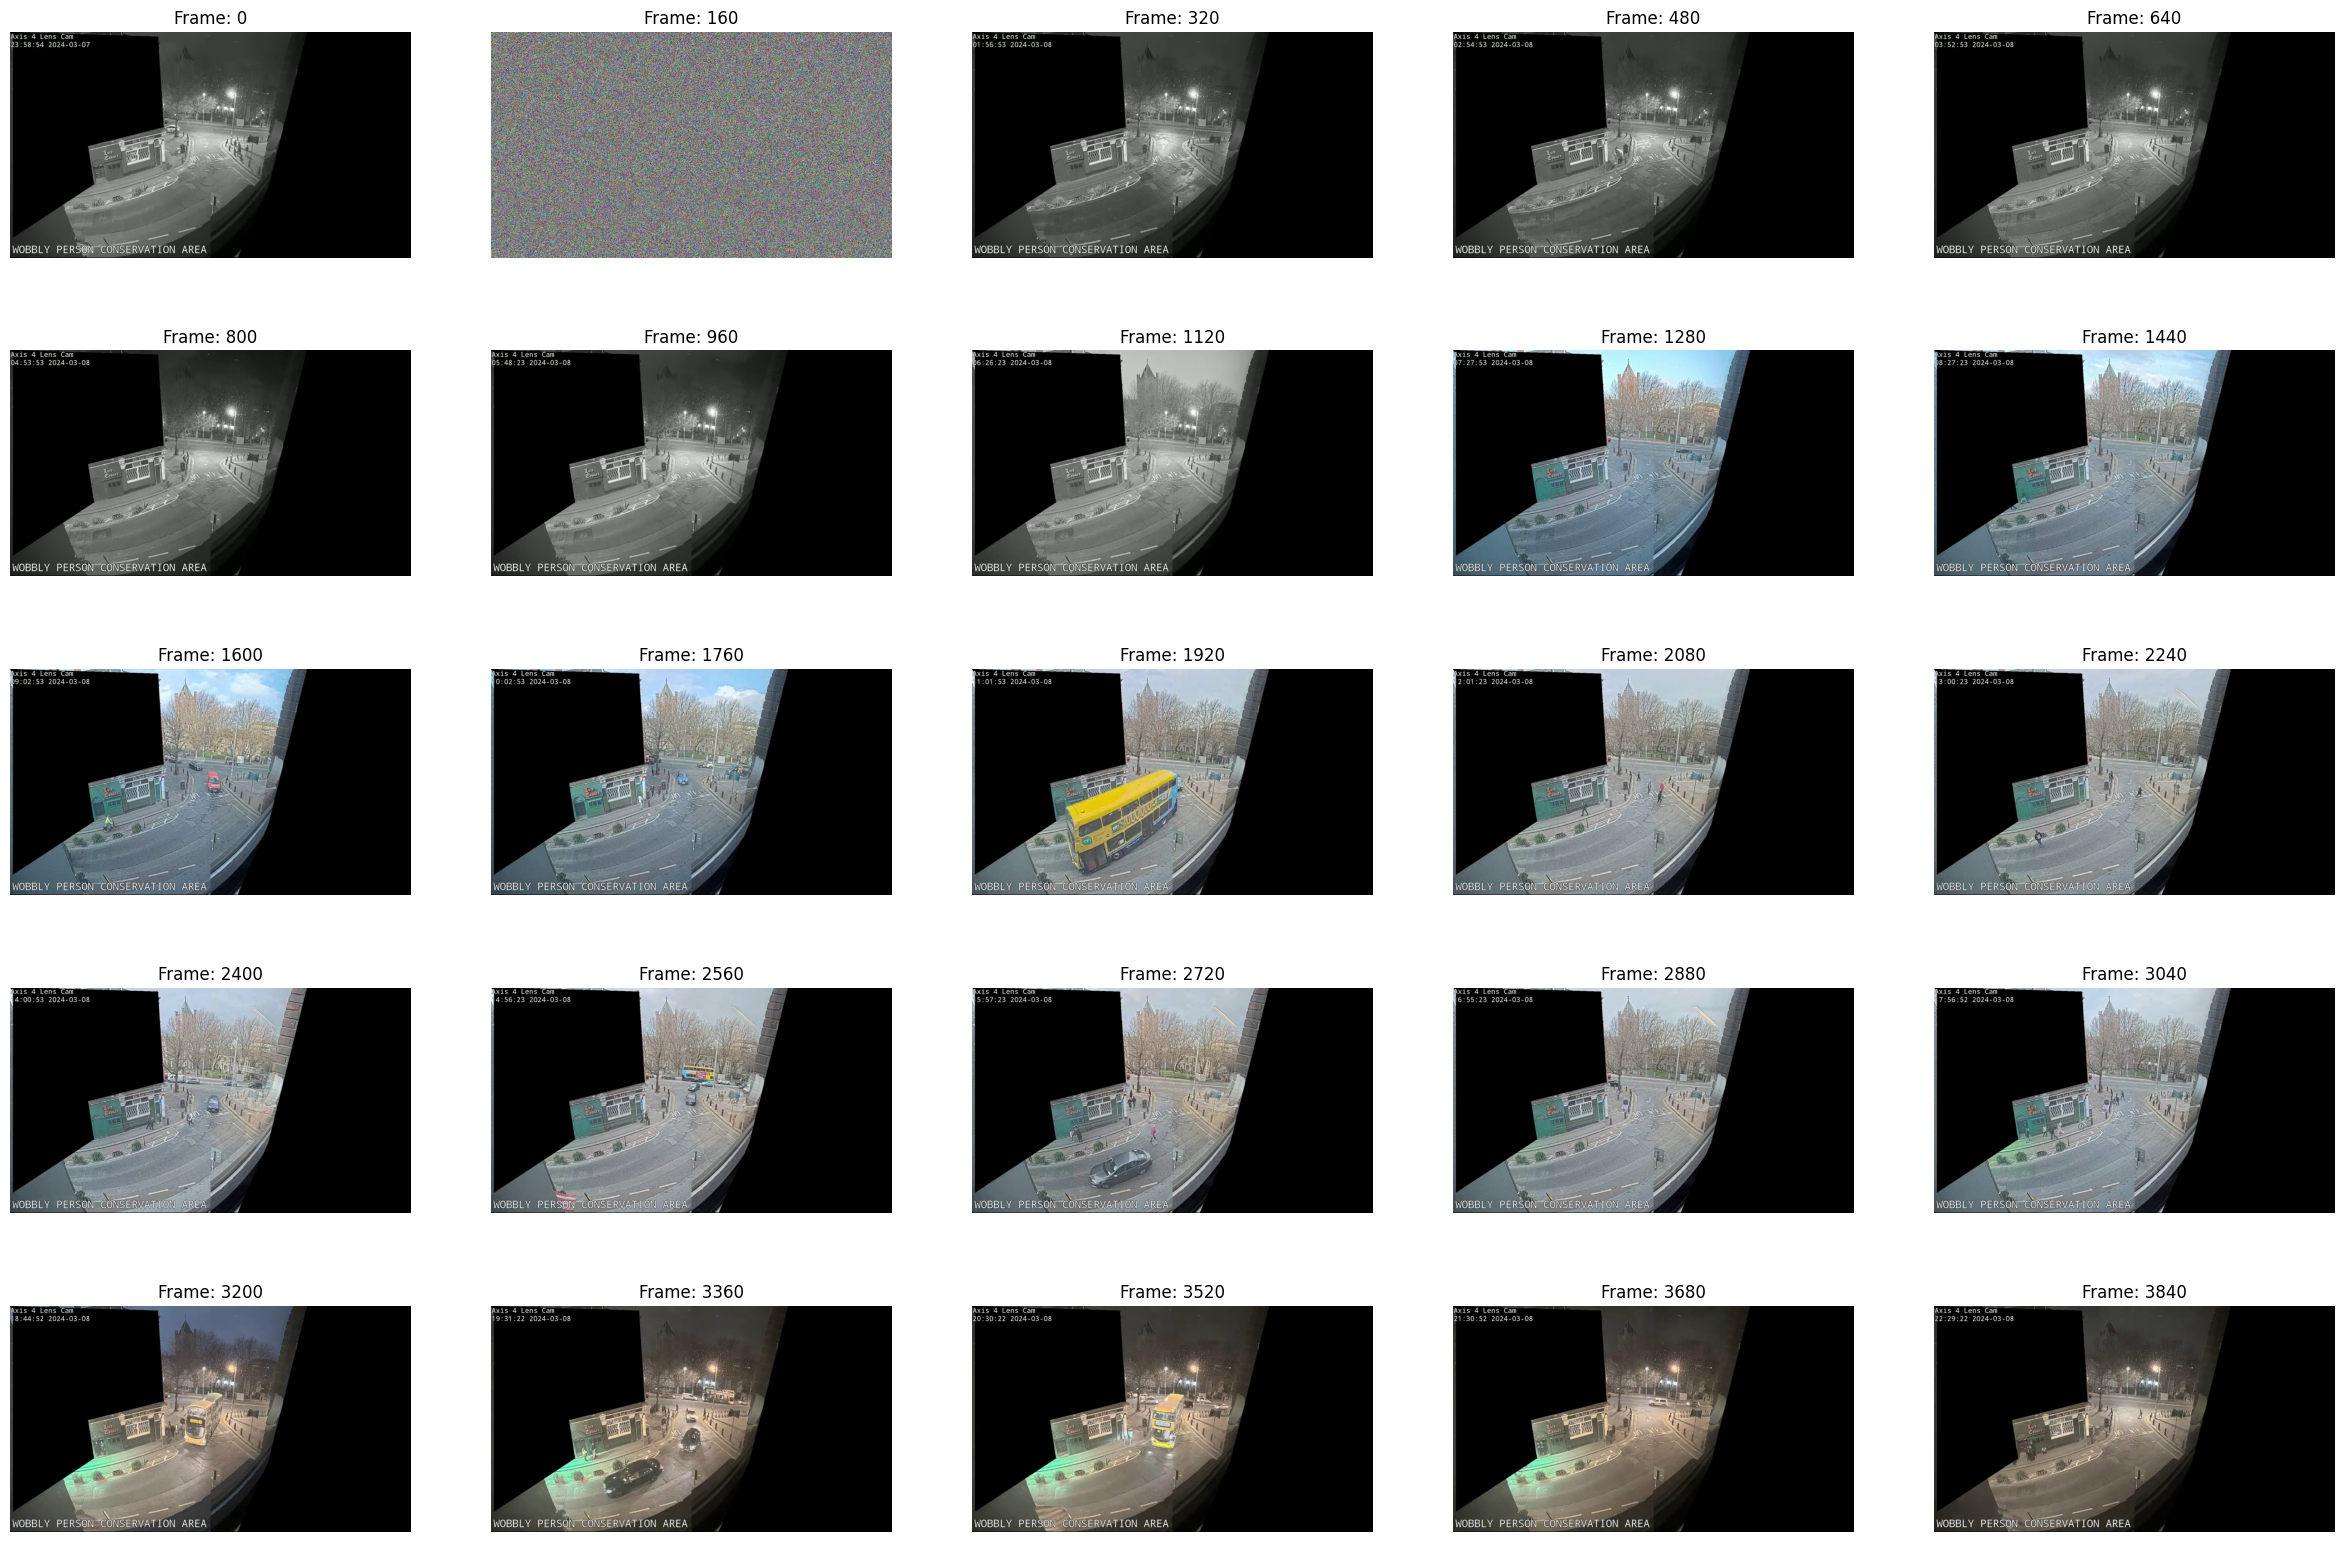

In [19]:
import os
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture("timelapse_test.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
i=0
img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    
    if frame % 16 == 0:
        rbg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        rbg = cv2.resize(rbg, (960, 544),interpolation = cv2.INTER_LINEAR)
        cv2.imwrite('/root/train/'+'frames_'+str(i)+'.jpg',rbg)
        i+=1
    
    if frame % 160 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

In [20]:
ls /root/train

frames_0.jpg    frames_144.jpg  frames_190.jpg  frames_236.jpg  frames_57.jpg
frames_1.jpg    frames_145.jpg  frames_191.jpg  frames_237.jpg  frames_58.jpg
frames_10.jpg   frames_146.jpg  frames_192.jpg  frames_238.jpg  frames_59.jpg
frames_100.jpg  frames_147.jpg  frames_193.jpg  frames_239.jpg  frames_6.jpg
frames_101.jpg  frames_148.jpg  frames_194.jpg  frames_24.jpg   frames_60.jpg
frames_102.jpg  frames_149.jpg  frames_195.jpg  frames_240.jpg  frames_61.jpg
frames_103.jpg  frames_15.jpg   frames_196.jpg  frames_241.jpg  frames_62.jpg
frames_104.jpg  frames_150.jpg  frames_197.jpg  frames_242.jpg  frames_63.jpg
frames_105.jpg  frames_151.jpg  frames_198.jpg  frames_243.jpg  frames_64.jpg
frames_106.jpg  frames_152.jpg  frames_199.jpg  frames_244.jpg  frames_65.jpg
frames_107.jpg  frames_153.jpg  frames_2.jpg    frames_245.jpg  frames_66.jpg
frames_108.jpg  frames_154.jpg  frames_20.jpg   frames_246.jpg  frames_67.jpg
frames_109.jpg  frames_155.jpg  frames_200.jpg  frames_247.jpg  f

In [21]:
test_im = cv2.imread("/root/train/frames_0.jpg")
print(test_im.shape)

(544, 960, 3)


In [22]:
import os, os.path
num_images=len([name for name in os.listdir('/root/train')])
print(num_images)

251


In [23]:
ls

timelapse_test.mp4


IndexError: index 25 is out of bounds for axis 0 with size 25

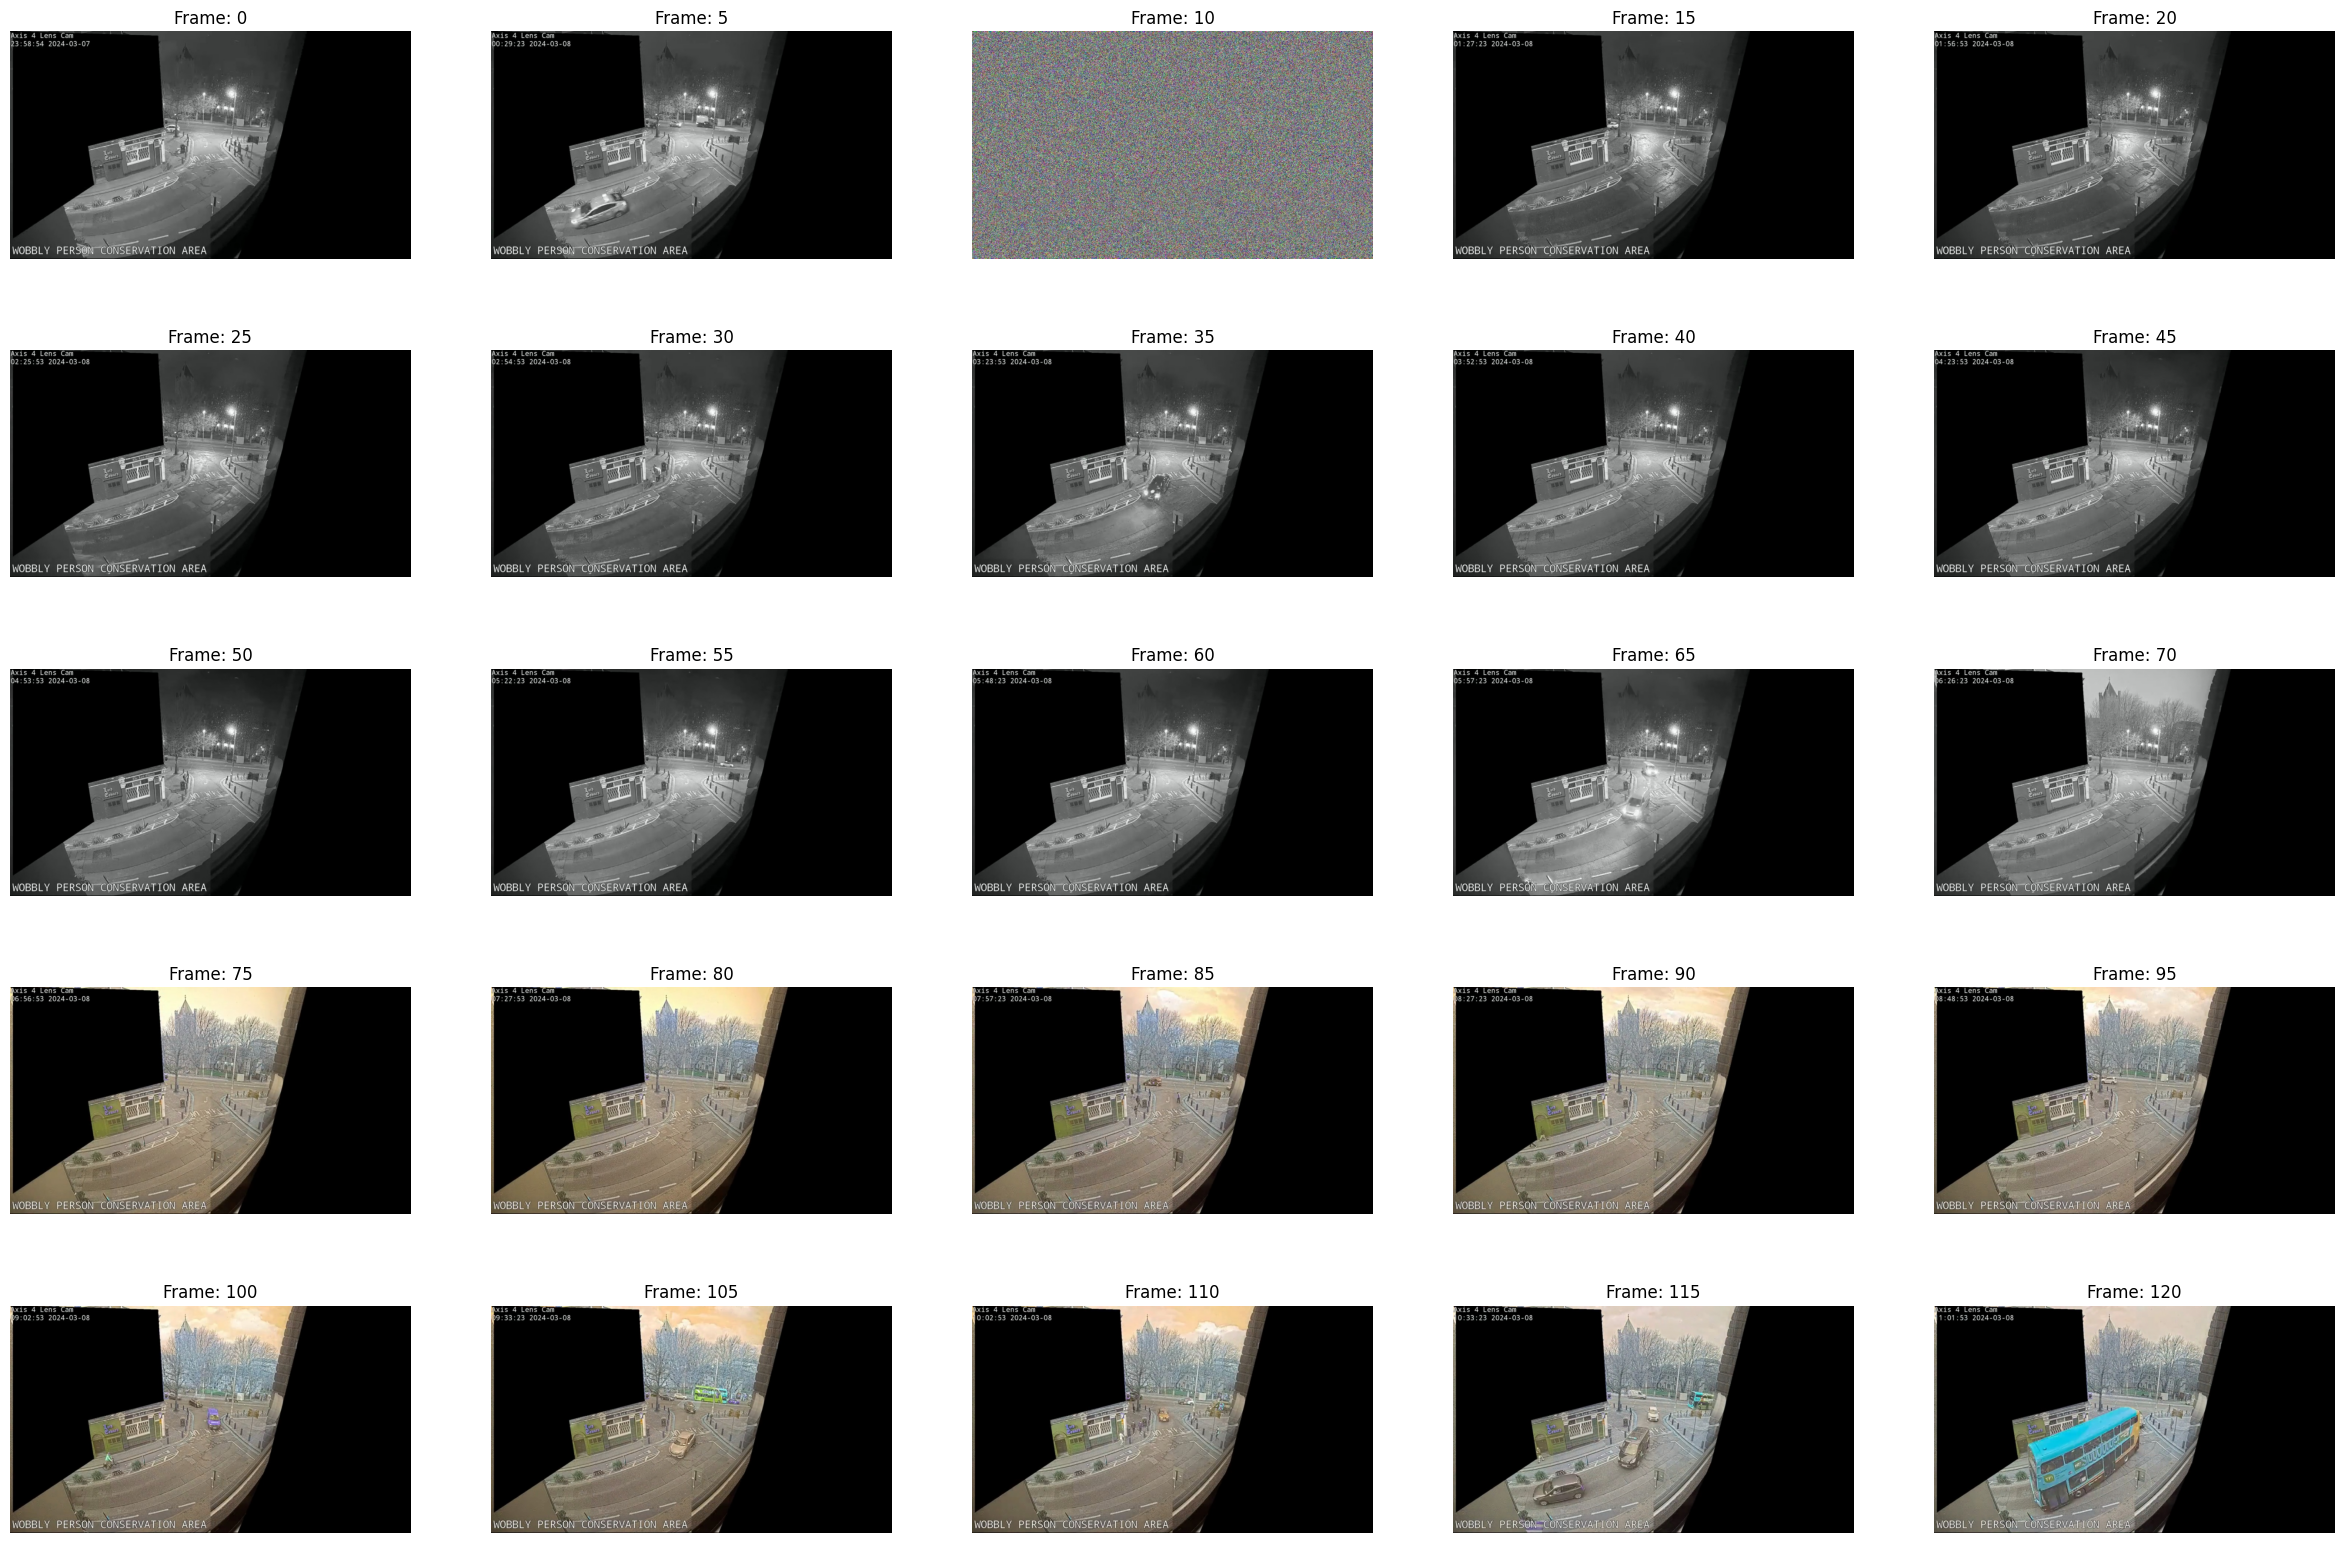

In [24]:
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()
img_idx=0
for frame in range(num_images):
    if frame % 5 == 0:
        img = mpimg.imread('/root/train/frames_'+str(frame)+'.jpg')
        axs[img_idx].imshow(img)
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1
plt.tight_layout()
plt.show()

In [26]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 594.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 2.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(data="coco128.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
results = model("/root/train/frames_0.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format

100%|██████████| 6.23M/6.23M [00:00<00:00, 72.6MB/s]


Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

100%|██████████| 6.66M/6.66M [00:00<00:00, 71.4MB/s]
Unzipping /kaggle/working/datasets/coco128.zip to /kaggle/working/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 3304.70file/s]

Dataset download success ✅ (1.0s), saved to /kaggle/working/datasets



100%|██████████| 755k/755k [00:00<00:00, 13.5MB/s]
2024-03-25 15:11:13,380	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-25 15:11:14,442	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-25 15:11:18.847730: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 15:11:18.847826: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 15:11:19.142295: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1080.81it/s]

train: New cache created: /kaggle/working/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.62G      1.145      1.449      1.246        130        640: 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        128        929      0.627       0.55      0.613      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.79G       1.21      1.437      1.272        178        640: 100%|██████████| 8/8 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        128        929      0.638      0.562      0.627      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.55G      1.149      1.325      1.226        280        640: 100%|██████████| 8/8 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        128        929      0.658      0.553       0.63      0.467



3 epochs completed in 0.007 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]


                   all        128        929      0.658      0.553       0.63      0.467
                person        128        254      0.798      0.673      0.772      0.543
               bicycle        128          6      0.492      0.333      0.326      0.281
                   car        128         46      0.911      0.217      0.283      0.187
            motorcycle        128          5      0.691      0.901      0.938      0.743
              airplane        128          6      0.826      0.796      0.927      0.717
                   bus        128          7      0.641      0.714      0.722      0.642
                 train        128          3       0.55      0.667      0.747      0.682
                 truck        128         12      0.975      0.417      0.488      0.293
                  boat        128          6      0.249      0.167      0.326      0.177
         traffic light        128         14      0.721       0.19      0.202      0.139
             stop sig

Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /kaggle/working/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]


                   all        128        929      0.664      0.558      0.635      0.471
                person        128        254      0.809      0.685      0.777      0.544
               bicycle        128          6       0.49      0.333      0.326       0.28
                   car        128         46      0.904      0.217      0.278      0.188
            motorcycle        128          5      0.691      0.903      0.938      0.742
              airplane        128          6      0.826      0.797      0.927      0.717
                   bus        128          7      0.639      0.714      0.722      0.641
                 train        128          3      0.548      0.667      0.747      0.682
                 truck        128         12      0.967      0.417      0.488      0.282
                  boat        128          6      0.228      0.167      0.388      0.165
         traffic light        128         14      0.723      0.191      0.202      0.139
             stop sig

In [28]:
im2 = cv2.imread("/root/train/frames_0.jpg")
results = model.predict(source=im2, save=True, save_txt=True)  # save predictions as labels


0: 384x640 1 car, 1 tv, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/train3
1 label saved to runs/detect/train3/labels


In [29]:
mkdir test

In [30]:
file_location=['/root/train/'+each for each in os.listdir('/root/train')]
print(file_location)

['/root/train/frames_156.jpg', '/root/train/frames_76.jpg', '/root/train/frames_90.jpg', '/root/train/frames_131.jpg', '/root/train/frames_209.jpg', '/root/train/frames_84.jpg', '/root/train/frames_197.jpg', '/root/train/frames_226.jpg', '/root/train/frames_43.jpg', '/root/train/frames_172.jpg', '/root/train/frames_70.jpg', '/root/train/frames_39.jpg', '/root/train/frames_122.jpg', '/root/train/frames_166.jpg', '/root/train/frames_161.jpg', '/root/train/frames_121.jpg', '/root/train/frames_160.jpg', '/root/train/frames_136.jpg', '/root/train/frames_141.jpg', '/root/train/frames_199.jpg', '/root/train/frames_4.jpg', '/root/train/frames_117.jpg', '/root/train/frames_178.jpg', '/root/train/frames_27.jpg', '/root/train/frames_250.jpg', '/root/train/frames_241.jpg', '/root/train/frames_220.jpg', '/root/train/frames_204.jpg', '/root/train/frames_30.jpg', '/root/train/frames_85.jpg', '/root/train/frames_69.jpg', '/root/train/frames_9.jpg', '/root/train/frames_229.jpg', '/root/train/frames_71.

In [31]:
from PIL import Image
results = model.predict(file_location,save=True, save_txt=True) 
# Visualize the results

# Visualize the results
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image
    # Save results to disk
    r.save(filename=f'test/results{i}.jpg')


0: 384x640 1 person, 3 cars, 2.4ms
1: 384x640 1 car, 2.4ms
2: 384x640 (no detections), 2.4ms
3: 384x640 1 person, 2.4ms
4: 384x640 1 laptop, 2.4ms
5: 384x640 1 car, 2.4ms
6: 384x640 (no detections), 2.4ms
7: 384x640 1 car, 2.4ms
8: 384x640 (no detections), 2.4ms
9: 384x640 2 cars, 2.4ms
10: 384x640 (no detections), 2.4ms
11: 384x640 (no detections), 2.4ms
12: 384x640 1 car, 1 truck, 2.4ms
13: 384x640 1 bus, 1 truck, 2.4ms
14: 384x640 (no detections), 2.4ms
15: 384x640 3 cars, 2 trucks, 2.4ms
16: 384x640 1 truck, 2.4ms
17: 384x640 (no detections), 2.4ms
18: 384x640 1 car, 2.4ms
19: 384x640 1 train, 2.4ms
20: 384x640 (no detections), 2.4ms
21: 384x640 1 car, 2.4ms
22: 384x640 1 person, 2.4ms
23: 384x640 1 tv, 2.4ms
24: 384x640 1 tv, 2.4ms
25: 384x640 1 tv, 2.4ms
26: 384x640 1 car, 1 bus, 2.4ms
27: 384x640 (no detections), 2.4ms
28: 384x640 1 tv, 2.4ms
29: 384x640 1 person, 1 car, 2.4ms
30: 384x640 (no detections), 2.4ms
31: 384x640 (no detections), 2.4ms
32: 384x640 (no detections), 2.4

In [32]:
ls /kaggle/working/test

results0.jpg    results144.jpg  results190.jpg  results236.jpg  results57.jpg
results1.jpg    results145.jpg  results191.jpg  results237.jpg  results58.jpg
results10.jpg   results146.jpg  results192.jpg  results238.jpg  results59.jpg
results100.jpg  results147.jpg  results193.jpg  results239.jpg  results6.jpg
results101.jpg  results148.jpg  results194.jpg  results24.jpg   results60.jpg
results102.jpg  results149.jpg  results195.jpg  results240.jpg  results61.jpg
results103.jpg  results15.jpg   results196.jpg  results241.jpg  results62.jpg
results104.jpg  results150.jpg  results197.jpg  results242.jpg  results63.jpg
results105.jpg  results151.jpg  results198.jpg  results243.jpg  results64.jpg
results106.jpg  results152.jpg  results199.jpg  results244.jpg  results65.jpg
results107.jpg  results153.jpg  results2.jpg    results245.jpg  results66.jpg
results108.jpg  results154.jpg  results20.jpg   results246.jpg  results67.jpg
results109.jpg  results155.jpg  results200.jpg  results247.jpg  r

In [33]:
ls /kaggle/working/runs/detect/train4/frames_150.jpg

/kaggle/working/test/results15.jpg


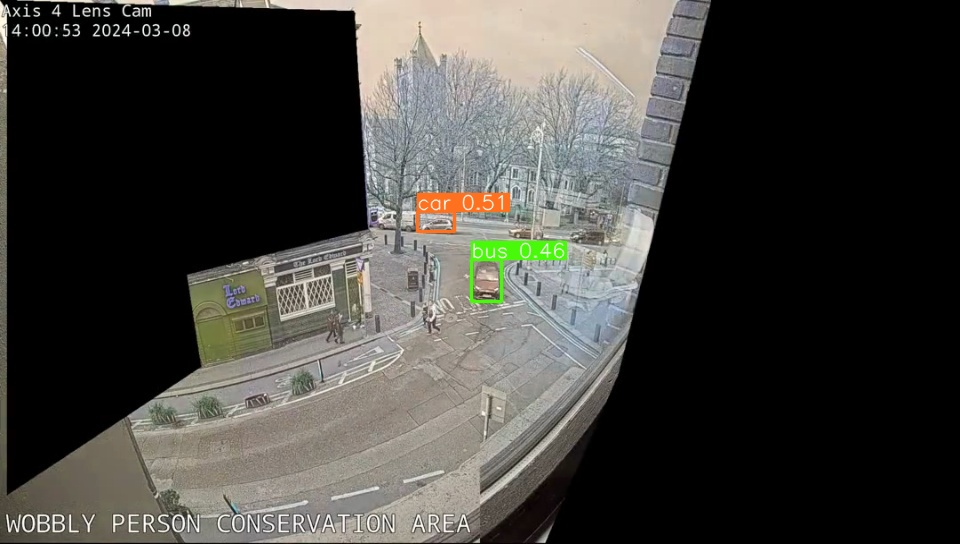

**Dumping data into COCO json format**

In [34]:
from datetime import date

today = date.today()
coco_dict={}
coco_dict["info"]={"description":"Frames Dataset","version": "1.0","year": "2024","date_created":today}
images_list=[]
for each in os.listdir('/root/train'):
    id=(each.split('_')[1]).split('.')[0]
    images_list.append({"id":id,"width": 960, "coco_url":'/root/train/'+each, "height": 544,"file_name": each, "date_captured": "2013-11-15 02:41:42"})
coco_dict["images"]=images_list
annotation_list=[]
for each in results:
    image_id = (each.path.split('_')[1]).split('.')[0]
    for i in range(len(each.boxes.cls)):
        annotation_list.append({'image_id':image_id,'category_id':each.boxes.cls[i],'bbox':each.boxes.xyxy[i]})
coco_dict["annotations"]=annotation_list
category_list=[]
names = model.names
for each in range(len(names)):
    category_list.append({'id':list(names.keys())[each],'name':list(names.values())[each]})
coco_dict["categories"]=category_list


In [35]:
coco_dict

{'info': {'description': 'Frames Dataset',
  'version': '1.0',
  'year': '2024',
  'date_created': datetime.date(2024, 3, 25)},
 'images': [{'id': '156',
   'width': 960,
   'coco_url': '/root/train/frames_156.jpg',
   'height': 544,
   'file_name': 'frames_156.jpg',
   'date_captured': '2013-11-15 02:41:42'},
  {'id': '76',
   'width': 960,
   'coco_url': '/root/train/frames_76.jpg',
   'height': 544,
   'file_name': 'frames_76.jpg',
   'date_captured': '2013-11-15 02:41:42'},
  {'id': '90',
   'width': 960,
   'coco_url': '/root/train/frames_90.jpg',
   'height': 544,
   'file_name': 'frames_90.jpg',
   'date_captured': '2013-11-15 02:41:42'},
  {'id': '131',
   'width': 960,
   'coco_url': '/root/train/frames_131.jpg',
   'height': 544,
   'file_name': 'frames_131.jpg',
   'date_captured': '2013-11-15 02:41:42'},
  {'id': '209',
   'width': 960,
   'coco_url': '/root/train/frames_209.jpg',
   'height': 544,
   'file_name': 'frames_209.jpg',
   'date_captured': '2013-11-15 02:41:42'}

Improving the Pretag cleanup 

In [37]:
improved_model = YOLO("yolov8n.pt")
improved_model.train(data="coco128.yaml", epochs=50,imgsz=640,dropout=0.5,weight_decay=0.0001)  # train the model
metrics = improved_model.val()  # evaluate model performance on the validation set
results = improved_model("/root/train/frames_0.jpg")  # predict on an image
path = improved_model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/working/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.74G      1.145      1.449      1.246        130        640: 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        128        929      0.627       0.55      0.613      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.87G       1.21       1.43      1.271        178        640: 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]

                   all        128        929      0.656      0.553      0.631       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.68G      1.143      1.306      1.222        280        640: 100%|██████████| 8/8 [00:01<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        128        929      0.669      0.571      0.646      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.85G      1.191      1.311      1.251        214        640: 100%|██████████| 8/8 [00:01<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all        128        929      0.708      0.583      0.659       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.75G      1.105      1.241       1.21        247        640: 100%|██████████| 8/8 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.61it/s]

                   all        128        929      0.717      0.588      0.671      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.9G      1.167      1.295      1.231        226        640: 100%|██████████| 8/8 [00:01<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        128        929       0.75      0.598      0.691      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.74G      1.149      1.218      1.199        239        640: 100%|██████████| 8/8 [00:01<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        128        929      0.774      0.602      0.707      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.74G       1.08      1.128      1.155        214        640: 100%|██████████| 8/8 [00:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        128        929      0.764      0.619      0.714      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.73G      1.104      1.145      1.179        195        640: 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]

                   all        128        929      0.777      0.635      0.727      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.63G      1.087      1.182      1.194        168        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]

                   all        128        929      0.784      0.639      0.734      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.08G      1.086      1.071      1.167        215        640: 100%|██████████| 8/8 [00:01<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all        128        929      0.779      0.656      0.747      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.78G      1.056      1.076      1.151        284        640: 100%|██████████| 8/8 [00:01<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all        128        929      0.799      0.661      0.753      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.7G      1.052      1.038      1.163        246        640: 100%|██████████| 8/8 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.61it/s]

                   all        128        929      0.827      0.657       0.76       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.67G      1.056      1.035      1.153        257        640: 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all        128        929      0.794      0.693      0.771      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.88G      1.026      1.028      1.144        249        640: 100%|██████████| 8/8 [00:01<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all        128        929      0.828      0.682      0.776      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.86G      1.044     0.9958      1.125        198        640: 100%|██████████| 8/8 [00:01<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        128        929      0.805      0.716      0.783      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.65G      1.056      1.028       1.16        206        640: 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all        128        929      0.859      0.688      0.791      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.85G      1.056     0.9549      1.132        208        640: 100%|██████████| 8/8 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        128        929      0.858      0.698      0.794      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.66G      1.019     0.9504      1.112        208        640: 100%|██████████| 8/8 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        128        929      0.839      0.712      0.806      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.72G     0.9531     0.9281      1.115        190        640: 100%|██████████| 8/8 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        128        929      0.857      0.705      0.812      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.67G     0.9763     0.9719      1.127        213        640: 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all        128        929      0.856      0.716      0.815      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.83G      1.045     0.9968      1.192        182        640: 100%|██████████| 8/8 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        128        929      0.851      0.716      0.815      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.73G     0.9608     0.9171      1.136        165        640: 100%|██████████| 8/8 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        128        929      0.855      0.722      0.817      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.62G      1.027     0.9235      1.135        217        640: 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        128        929      0.848      0.732      0.813      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.72G     0.9731     0.8931      1.118        210        640: 100%|██████████| 8/8 [00:01<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        128        929      0.853      0.734      0.816      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.69G     0.9796     0.9592      1.133        167        640: 100%|██████████| 8/8 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all        128        929      0.862      0.732      0.818      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.68G     0.9416     0.8665      1.102        226        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]

                   all        128        929      0.882      0.726      0.822      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.7G     0.9659     0.8608      1.106        235        640: 100%|██████████| 8/8 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        128        929      0.871      0.732      0.825      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.72G     0.9558     0.8956      1.106        243        640: 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]

                   all        128        929      0.859      0.735      0.838      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.68G     0.9776     0.9222      1.125        214        640: 100%|██████████| 8/8 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all        128        929      0.824      0.768       0.84       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.78G     0.9323      0.877      1.096        214        640: 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all        128        929      0.882      0.742      0.842      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.66G     0.9654      0.898      1.108        216        640: 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        128        929      0.892      0.739      0.845      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.72G     0.9645      0.893      1.099        303        640: 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]

                   all        128        929      0.819      0.794      0.847      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.74G      0.986     0.8936      1.106        160        640: 100%|██████████| 8/8 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]

                   all        128        929      0.847      0.784      0.849      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.7G     0.9207     0.8809      1.109        183        640: 100%|██████████| 8/8 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]

                   all        128        929      0.892      0.764      0.847      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.69G     0.9688     0.9189      1.088        258        640: 100%|██████████| 8/8 [00:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all        128        929      0.895      0.772      0.851      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.77G     0.9304     0.8512      1.109        131        640: 100%|██████████| 8/8 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]

                   all        128        929      0.883      0.774       0.85      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.7G     0.8909     0.8144      1.091        173        640: 100%|██████████| 8/8 [00:01<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        128        929      0.874      0.781      0.851      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.71G     0.9171     0.8211      1.094        261        640: 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]

                   all        128        929       0.88      0.777      0.851      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.63G     0.9169      0.836      1.082        213        640: 100%|██████████| 8/8 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        128        929      0.864      0.786      0.851      0.683


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.79G     0.9611     0.8971      1.076         88        640: 100%|██████████| 8/8 [00:03<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        128        929      0.854        0.8      0.852      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.67G      0.982     0.8882      1.086        117        640: 100%|██████████| 8/8 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all        128        929      0.837      0.806      0.849      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.66G     0.9728     0.9306      1.101         92        640: 100%|██████████| 8/8 [00:01<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.44it/s]

                   all        128        929      0.833      0.799      0.846       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.71G     0.9496     0.9151      1.071         99        640: 100%|██████████| 8/8 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all        128        929      0.866      0.778      0.845      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.63G     0.9471     0.8151      1.069         82        640: 100%|██████████| 8/8 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        128        929      0.862      0.773      0.843      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.71G     0.9992     0.8977      1.078        157        640: 100%|██████████| 8/8 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]

                   all        128        929      0.864       0.77      0.843      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.67G     0.9415     0.8408      1.072         60        640: 100%|██████████| 8/8 [00:01<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        128        929      0.862      0.768      0.842      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.67G     0.9279     0.7858      1.044         96        640: 100%|██████████| 8/8 [00:01<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]

                   all        128        929      0.841      0.786      0.842      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.63G     0.9044     0.7928      1.049        114        640: 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        128        929      0.836      0.789      0.843      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.74G     0.9314     0.8074      1.053         84        640: 100%|██████████| 8/8 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all        128        929      0.835      0.789      0.841      0.675



50 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.47s/it]


                   all        128        929       0.88      0.777      0.851      0.683
                person        128        254      0.956      0.686      0.856      0.651
               bicycle        128          6      0.785        0.5      0.595      0.454
                   car        128         46      0.943      0.363      0.623      0.318
            motorcycle        128          5      0.913          1      0.995      0.898
              airplane        128          6      0.932          1      0.995      0.954
                   bus        128          7      0.919      0.714      0.802       0.68
                 train        128          3      0.879          1      0.995      0.808
                 truck        128         12      0.928        0.5      0.618      0.455
                  boat        128          6          1      0.555      0.855       0.58
         traffic light        128         14      0.722      0.191      0.243      0.183
             stop sig

Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /kaggle/working/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]


                   all        128        929      0.835      0.801       0.85      0.683
                person        128        254      0.954      0.735      0.856      0.655
               bicycle        128          6      0.681        0.5      0.595      0.471
                   car        128         46      0.903      0.407      0.619      0.324
            motorcycle        128          5       0.88          1      0.995      0.923
              airplane        128          6      0.916          1      0.995       0.93
                   bus        128          7      0.899      0.714      0.802       0.68
                 train        128          3      0.847          1      0.995      0.808
                 truck        128         12      0.901        0.5      0.618      0.455
                  boat        128          6      0.795       0.65      0.766      0.498
         traffic light        128         14      0.693      0.214      0.245      0.184
             stop sig

In [40]:
ls /kaggle/working/test

improved_results0.jpg  results154.jpg  results210.jpg  results42.jpg
results0.jpg           results155.jpg  results211.jpg  results43.jpg
results1.jpg           results156.jpg  results212.jpg  results44.jpg
results10.jpg          results157.jpg  results213.jpg  results45.jpg
results100.jpg         results158.jpg  results214.jpg  results46.jpg
results101.jpg         results159.jpg  results215.jpg  results47.jpg
results102.jpg         results16.jpg   results216.jpg  results48.jpg
results103.jpg         results160.jpg  results217.jpg  results49.jpg
results104.jpg         results161.jpg  results218.jpg  results5.jpg
results105.jpg         results162.jpg  results219.jpg  results50.jpg
results106.jpg         results163.jpg  results22.jpg   results51.jpg
results107.jpg         results164.jpg  results220.jpg  results52.jpg
results108.jpg         results165.jpg  results221.jpg  results53.jpg
results109.jpg         results166.jpg  results222.jpg  results54.jpg
results11.jpg          results167.j

In [41]:
from PIL import Image
improved_results = improved_model.predict(file_location,save=True, save_txt=True) 
# Visualize the results

# Visualize the results
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image
    # Save results to disk
    r.save(filename=f'test/improved_results{i}.jpg')


0: 384x640 1 person, 3 cars, 2.4ms
1: 384x640 1 car, 2.4ms
2: 384x640 (no detections), 2.4ms
3: 384x640 1 person, 2.4ms
4: 384x640 1 car, 1 tv, 2.4ms
5: 384x640 (no detections), 2.4ms
6: 384x640 2 cars, 1 train, 2.4ms
7: 384x640 1 car, 1 train, 1 tv, 2.4ms
8: 384x640 1 tv, 2.4ms
9: 384x640 1 car, 2.4ms
10: 384x640 1 train, 2.4ms
11: 384x640 1 tv, 2.4ms
12: 384x640 1 car, 1 bus, 1 truck, 2.4ms
13: 384x640 1 bus, 2.4ms
14: 384x640 (no detections), 2.4ms
15: 384x640 2 cars, 1 truck, 2.4ms
16: 384x640 (no detections), 2.4ms
17: 384x640 (no detections), 2.4ms
18: 384x640 1 truck, 1 cell phone, 2.4ms
19: 384x640 2 trains, 2.4ms
20: 384x640 1 train, 2.4ms
21: 384x640 1 car, 2.4ms
22: 384x640 1 car, 2.4ms
23: 384x640 1 tv, 2.4ms
24: 384x640 1 tv, 2.4ms
25: 384x640 1 tv, 2.4ms
26: 384x640 1 car, 1 bus, 2.4ms
27: 384x640 (no detections), 2.4ms
28: 384x640 1 tv, 2.4ms
29: 384x640 1 person, 1 car, 2.4ms
30: 384x640 1 train, 2.4ms
31: 384x640 (no detections), 2.4ms
32: 384x640 1 car, 1 tv, 2.4ms
3

In [ ]:
ls /kaggle/working/runs/detect/train64/frames_150.jpg

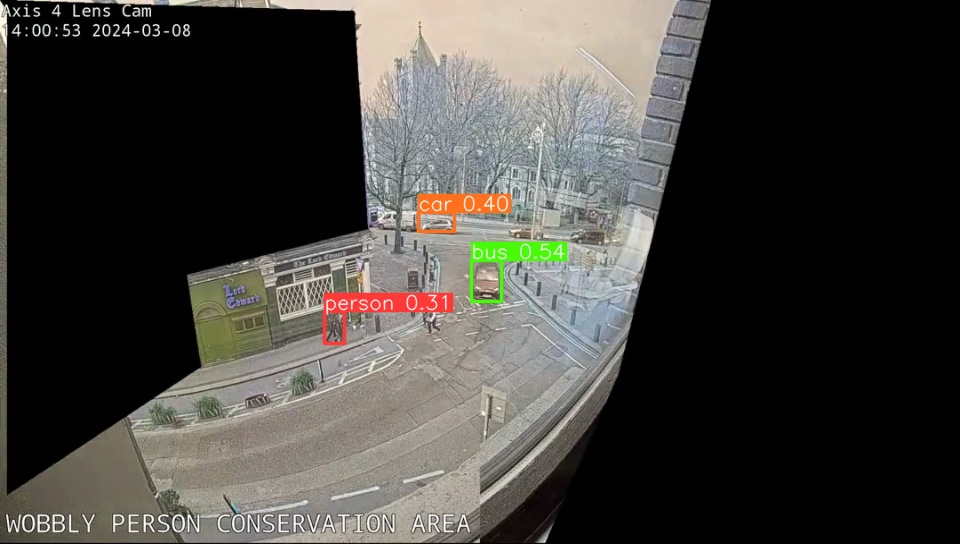